In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, Conv2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Sequential

# root dir 설정

In [2]:
import os

ROOT_DIR = '/content'

DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'surface_crack')

TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train')

TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'test')

# Google Drive 마운트해서 데이터셋 가져옴

In [3]:
from google.colab import drive   

drive.mount('/content/gdrive/')  

Mounted at /content/gdrive/


In [4]:
import shutil
import os

try:
    dataset_path = '/content/gdrive/My Drive/Colab Notebooks/dataset'    
    shutil.copy(os.path.join(dataset_path, 'surface_crack.zip'), ROOT_DIR)

except Exception as err:
    print(str(err))

In [5]:
import os
import shutil

if os.path.exists(DATA_ROOT_DIR):
    
    shutil.rmtree(DATA_ROOT_DIR)
    print(DATA_ROOT_DIR + ' is removed !!!')

In [6]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile(os.path.join(ROOT_DIR, 'surface_crack.zip'), 'r') as target_file:

    target_file.extractall(DATA_ROOT_DIR) 

# surface_crack/Positive 확인
# surface_crack/Negative 확인

In [7]:
import os

# Positive / Negative 전체 데이터 개수 확인

label_name_list = os.listdir(DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(DATA_ROOT_DIR, label_name)

    print('train label : ' + label_name + ' => ', len(os.listdir(os.path.join(DATA_ROOT_DIR, label_name))))

print('=====================================================')

['Positive', 'Negative']
train label : Positive =>  20000
train label : Negative =>  20000


# copytree 이용해서 Positive, Negative 모든 내용을 train 디렉토리 아래로 동일한 이름의 디렉토리로 복사함
### 이때, train 디렉토리는 자동으로 생성됨 (미리 생성하면 copytree 사용법상 error 발생)

In [8]:
import shutil

try:
    shutil.copytree(DATA_ROOT_DIR, TRAIN_DATA_ROOT_DIR)
    
except Exception as err:
    print(str(err))

# train/Positive, train/Negative 파일 개수 확인

In [9]:
import os

# Positive / Negative 전체 데이터 개수 확인

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)

    print('train label : ' + label_name + ' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

['Positive', 'Negative']
train label : Positive =>  20000
train label : Negative =>  20000


# surface_crack/test 디렉토리 생성
# surface_crack/test/Positive, Negative 디렉토리 생성

In [10]:
#==============================================================
# test dir 생성
#==============================================================
if not os.path.exists(TEST_DATA_ROOT_DIR):

    os.mkdir(TEST_DATA_ROOT_DIR)
    print(TEST_DATA_ROOT_DIR + ' is created !!')
    
else:
    print(TEST_DATA_ROOT_DIR + ' already exists')
#==============================================================


#==============================================================
# test/Positive 생성
#==============================================================
if not os.path.exists(os.path.join(TEST_DATA_ROOT_DIR, 'Positive')):

    os.mkdir(os.path.join(TEST_DATA_ROOT_DIR, 'Positive'))
    print(os.path.join(TEST_DATA_ROOT_DIR, 'Positive') + ' is created !!')

else:
    print(os.path.join(TEST_DATA_ROOT_DIR, 'Positive') + ' already exists')

#==============================================================
# test/Negative 생성
#==============================================================
if not os.path.exists(os.path.join(TEST_DATA_ROOT_DIR, 'Negative')):

    os.mkdir(os.path.join(TEST_DATA_ROOT_DIR, 'Negative'))
    print(os.path.join(TEST_DATA_ROOT_DIR, 'Negative') + ' is created !!')

else:
    print(os.path.join(TEST_DATA_ROOT_DIR, 'Negative') + ' already exists')
#==============================================================

/content/surface_crack/test is created !!
/content/surface_crack/test/Positive is created !!
/content/surface_crack/test/Negative is created !!


# move 비율 설정

In [11]:
# 파일 move 비율

MOVE_RATIO = 0.2  # train : test = 80 : 20, 즉 train 데이터 20% 데이터를 test 데이터로 사용

# 원하는 비율만큼 Positive -> train/Positive  move   
# 원하는 비율만큼 Negative -> train/Negative  move

In [12]:
import os
import glob
import shutil
import random

# 파일 move train_data_dir => test_data_dir

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

for label_name in label_name_list:

    # 파일 move 하기 위한 src_dir_path, dst_dir_path 설정
    #=========================================================
    src_dir_path = os.path.join(TRAIN_DATA_ROOT_DIR,label_name)  # /content/surfae_crack/train/Positive
    dst_dir_path = os.path.join(TEST_DATA_ROOT_DIR,label_name)  # /content/surfae_crack/test/Positive
    #=========================================================

    train_data_file_list = os.listdir(src_dir_path)

    print('========================================================================')
    print('total [%s] data file nums => [%s]' % (label_name ,len(train_data_file_list)))

    # data shuffle
    random.shuffle(train_data_file_list)
    print('train data shuffle is done !!!')

    split_num = int(MOVE_RATIO*len(train_data_file_list))

    print('split nums => ', split_num)

    # extract test data from train data
    test_data_file_list = train_data_file_list[0:split_num]

    move_nums = 0

    for test_data_file in test_data_file_list:

        try:
            shutil.move(os.path.join(src_dir_path, test_data_file),
                        os.path.join(dst_dir_path, test_data_file))   
        except Exception as err:
            print(str(err))

        move_nums = move_nums + 1

    print('total move nums => ', move_nums)
    print('========================================================================')

total [Positive] data file nums => [20000]
train data shuffle is done !!!
split nums =>  4000
total move nums =>  4000
total [Negative] data file nums => [20000]
train data shuffle is done !!!
split nums =>  4000
total move nums =>  4000


# train/Positive, train/Negative 파일 개수 확인
# test/Positive, test/Negative 파일 개수 확인

In [13]:
import os

#==============================================================================
# train 파일 개수 확인
#==============================================================================

# Positive / Negative 전체 데이터 개수 확인

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)

    print('train label : ' + label_name + ' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#==============================================================================


#==============================================================================
# test 파일 개수 확인
#==============================================================================

# Positive / Negative 전체 데이터 개수 확인

label_name_list = os.listdir(TEST_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(TEST_DATA_ROOT_DIR, label_name)

    print('test label : ' + label_name + ' => ', len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#==============================================================================

['Positive', 'Negative']
train label : Positive =>  16000
train label : Negative =>  16000
['Positive', 'Negative']
test label : Positive =>  4000
test label : Negative =>  4000


# 이미지 shape 설정

In [14]:
IMG_WIDTH = 64  # 128 die
IMG_HEIGHT = 64  # 128 die

# class_dict 정의

In [15]:
class_dict = { 'Negative' : 0, 'Positive' : 1 }

# OpenCV 이용해서 train image 로드

In [16]:
train_data_list = []
train_label_list = []

In [17]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_label_list = os.listdir(TRAIN_DATA_ROOT_DIR)    # 정답이름

for label_name in image_label_list:

    # 이미지 파일 읽어오기

    file_path = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)

    img_file_list = glob.glob(file_path+'/*.jpg')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .jpg 파일 읽어서 리스트에 저장
    
    for img_file in img_file_list:
        
        try:
            src_img = cv2.imread(img_file, cv2.IMREAD_COLOR) 
            src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))
            src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

            train_data_list.append(src_img)
            train_label_list.append(float(class_dict[label_name]))  # 정답은 문자열 => 실수로 변환

        except Exception as err:
            print(str(err), img_file)
            continue

# train data 생성

In [18]:
# numpy 변환

x_train = np.array(train_data_list).astype('float32')
y_train = np.array(train_label_list).astype('float32')

print('x_train.shape = ', x_train.shape, ', y_train.shape = ', y_train.shape)

x_train.shape =  (32000, 64, 64, 3) , y_train.shape =  (32000,)


# OpenCV 이용해서 test image 로드

In [19]:
test_data_list = []
test_label_list = []

In [20]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_label_list = os.listdir(TEST_DATA_ROOT_DIR)    # 정답이름

for label_name in image_label_list:

    # 이미지 파일 읽어오기

    file_path = os.path.join(TEST_DATA_ROOT_DIR, label_name)
    img_file_list = glob.glob(file_path+'/*.jpg')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .jpg 파일 읽어서 리스트에 저장
    
    for img_file in img_file_list:

        try:
            src_img = cv2.imread(img_file, cv2.IMREAD_COLOR) 
            src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))
            src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

            test_data_list.append(src_img)
            test_label_list.append(float(class_dict[label_name]))  # 정답은 문자열을 실수로 변환

        except Exception as err:
            print(str(err), img_file)
            continue

# test data 생성

In [21]:
# numpy 변환

x_test = np.array(test_data_list).astype('float32')
y_test = np.array(test_label_list).astype('float32')

print('x_test.shape = ', x_test.shape, ', y_test.shape = ', y_test.shape)

x_test.shape =  (8000, 64, 64, 3) , y_test.shape =  (8000,)


In [22]:
import random

random_index_list = random.sample( list(range(len(y_train))), 16) 
print(random_index_list)
print(y_train[random_index_list])

[13990, 24590, 10158, 24492, 24558, 25703, 6596, 18825, 20343, 10870, 31041, 12218, 24769, 16613, 30936, 22456]
[1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]


# 정규화

In [23]:
x_train = x_train / 255.0

x_test = x_test / 255.0

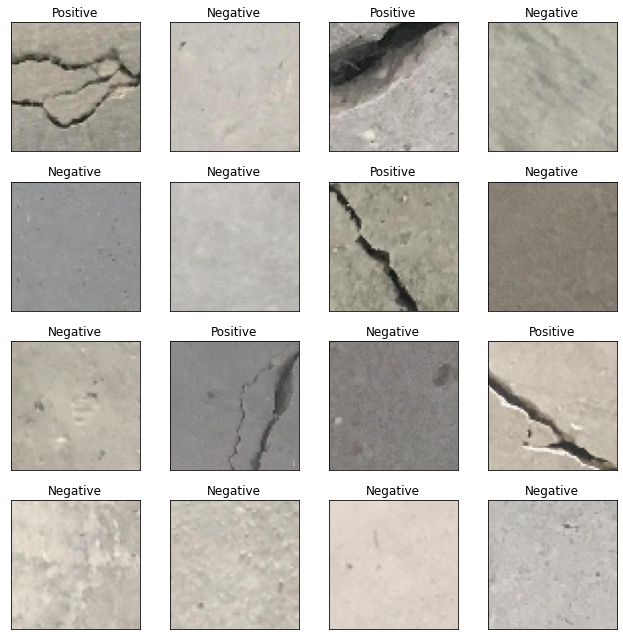

In [24]:
import matplotlib.pyplot as plt

class_names = { 0 : 'Negative', 1 : 'Positive'}

plt.figure(figsize=(9,9))

pos = 0

for i in random_index_list:

    plt.subplot(4, 4, pos+1)
    plt.title(str(class_names[y_train[i]]))
    plt.xticks([]);  plt.yticks([])

    plt.imshow(x_train[i])

    pos += 1

plt.tight_layout()
plt.show()

# CNN model 정의 및 모델 구축

In [25]:
class_nums = len(os.listdir(TRAIN_DATA_ROOT_DIR))  # 정답개수

model = Sequential()

model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', padding='same', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(kernel_size=(3,3), filters=128, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(GlobalAveragePooling2D())

# 32개면 정확도가 낮음. 256은 약 98% 이나 trend 가 거칠다
# 512 일때 정확도가 더 높고 256에 비해 정확도와 손실값이 그나마 안정적이다
model.add(Dense(512, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(class_nums, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [26]:
model.compile(loss='sparse_categorical_crossentropy', 
            optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)


start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), 
                 callbacks=[earlystopping])

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/30
1000/1000 [==============================] - 18s 8ms/step - loss: 0.1021 - acc: 0.9549 - val_loss: 0.0347 - val_acc: 0.9908
Epoch 2/30
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0384 - acc: 0.9877 - val_loss: 0.0499 - val_acc: 0.9855
Epoch 3/30
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0335 - acc: 0.9896 - val_loss: 0.0300 - val_acc: 0.9915
Epoch 4/30
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0286 - acc: 0.9910 - val_loss: 0.0273 - val_acc: 0.9931
Epoch 5/30
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0232 - acc: 0.9927 - val_loss: 0.0201 - val_acc: 0.9948
Epoch 6/30
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0204 - acc: 0.9937 - val_loss: 0.0152 - val_acc: 0.9952
Epoch 7/30
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0170 - acc: 0.9945 - val_loss: 0.0083 - val_acc: 0.9969
Epoch 8/30
1000/1000 [==============================] - 8s 8m

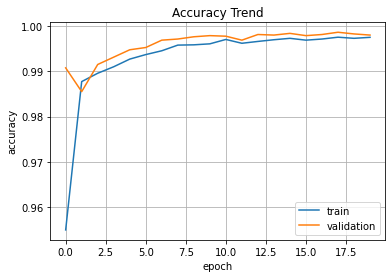

In [28]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

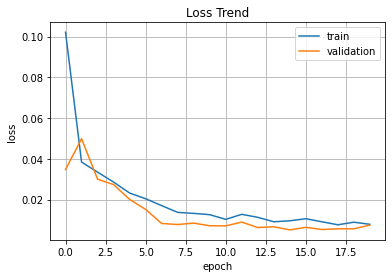

In [29]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [30]:
model.evaluate(x_test, y_test)

250/250 [==============================] - 1s 4ms/step - loss: 0.0075 - acc: 0.9980


[0.007472064811736345, 0.9980000257492065]